## mmseg tutorial

In [22]:
import cv2


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
mask = cv2.cvtColor(cv2.imread("../split_data_224_trash/train_mask/0_7.png"), cv2.COLOR_BGR2RGB)
for i in mask:
    for j in i:
        print(j)

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # nvidia-smi로 비어있는 gpu 확인하고 여기서 선택할것!

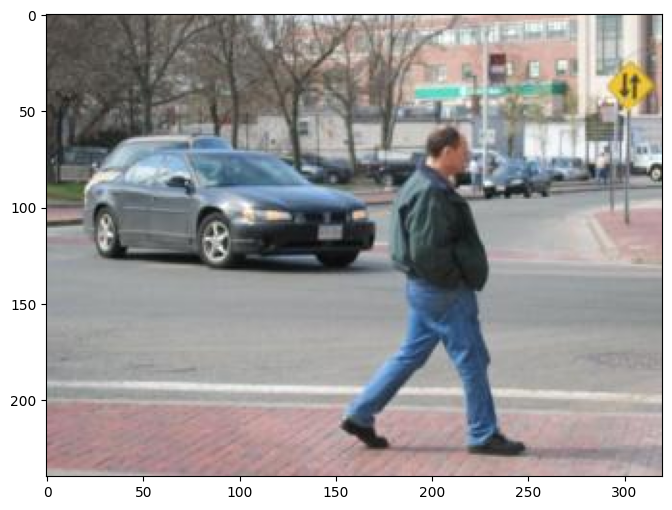

In [2]:
# Let's take a look at the dataset
import mmcv
import mmengine
import matplotlib.pyplot as plt


img = mmcv.imread('iccv09Data/images/6000124.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [28]:
# define dataset root and directory for images and annotations
data_root = 'split_data_224_trash'
img_dir = 'train_image'
ann_dir = 'train_mask'
# define class and palette for better visualization
classes = ('background', 'building')
palette = [[0,0,0], [1, 1, 1]]

In [29]:
import os.path as osp
import numpy as np
from PIL import Image

# # convert dataset annotation to semantic segmentation map
# for file in mmengine.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
#   seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
#   seg_img = Image.fromarray(seg_map).convert('P')
#   seg_img.putpalette(np.array(palette, dtype=np.uint8))
#   seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt', 
#                                                          '.png')))

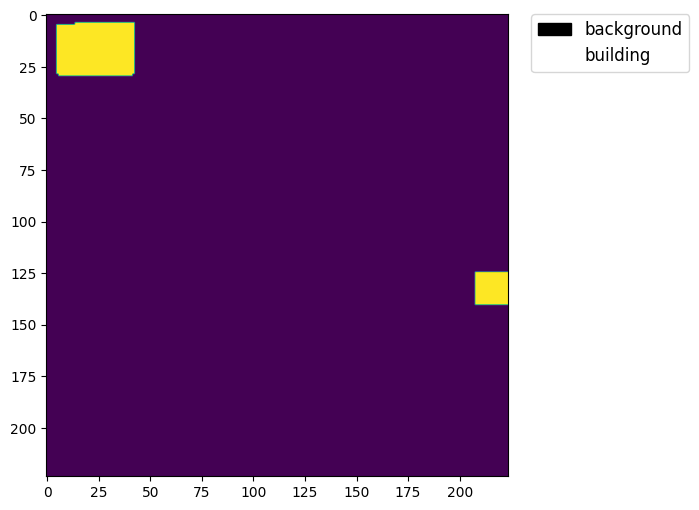

<PIL.PngImagePlugin.PngImageFile image mode=L size=224x224 at 0x7F4E7EB19BD0>


In [31]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches

img = Image.open('../split_data_224_trash/train_mask/0_7.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('L')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/1., 
                          label=classes[i]) for i in range(2)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

print(img)

In [7]:
# split train/val set randomly
split_dir = 'splits'
mmengine.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

In [8]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset


@DATASETS.register_module()
class StanfordBackgroundDataset(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

In [9]:
from mmengine import Config
cfg = Config.fromfile('./mmsegmentation/configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='SyncBN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    std=[
        58.395,
        57.12,
        57.375,
    ],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[
            123.675,
            116.28,
            103.53,
        ],
        std=[
            58.395,
            57.12,
            57.375,
        ],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(
            512,
            1024,
        )),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(
            0,
            1,
            2,
            3,
        ),
        dilations=(
 

In [10]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 8
cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path
cfg.dataset_type = 'StanfordBackgroundDataset'
cfg.data_root = data_root

cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(320, 240), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(320, 240), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]


cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader


# Load the pretrained weights
cfg.load_from = './iccv09Data/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = 200
cfg.train_cfg.val_interval = 200
cfg.default_hooks.logger.interval = 10
cfg.default_hooks.checkpoint.interval = 200

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    std=[
        58.395,
        57.12,
        57.375,
    ],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[
            123.675,
            116.28,
            103.53,
        ],
        std=[
            58.395,
            57.12,
            57.375,
        ],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(
            256,
            256,
        )),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(
            0,
            1,
            2,
            3,
        ),
        dilations=(
      

In [11]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

07/16 07:00:06 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.6 (default, Jan  8 2020, 19:59:22) [GCC 7.3.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0,1: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.2, V11.2.152
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.12.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-

/home/leadawon5/dawon/vision/dacon/dacondawon/mmseg/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/home/leadawon5/dawon/vision/dacon/dacondawon/mmseg/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/leadawon5/dawon/vision/dacon/dacondawon/mmseg/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


07/16 07:00:11 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
07/16 07:00:11 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/home/leadawon5/dawon/vision/dacon/dacondawon/mmseg/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [19]:
# start training
runner.train()

07/16 06:54:23 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
07/16 06:54:24 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
07/16 06:54:24 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
07/16 06:54:24 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: ./iccv09Data/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param w

KeyboardInterrupt: 

Loads checkpoint by local backend from path: ./iccv09Data/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
07/16 07:00:17 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


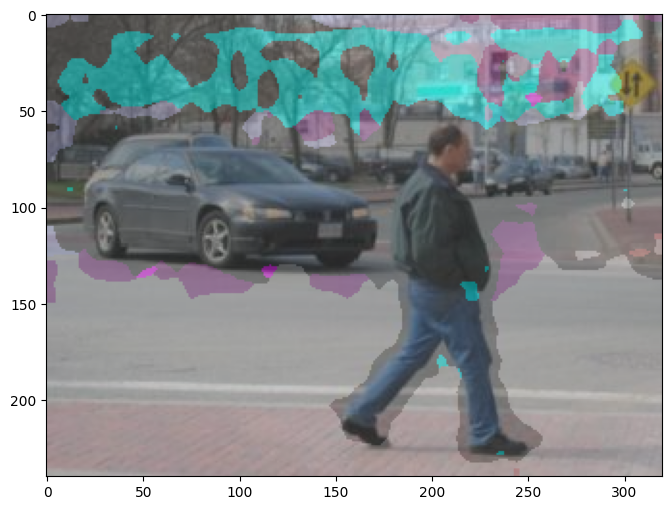

In [12]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

# Init the model from the config and the checkpoint
checkpoint_path = './work_dirs/tutorial/iter_200.pth'
checkpoint_path = "./iccv09Data/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth"
cuda_num = 1
model = init_model(cfg, checkpoint_path, f'cuda:{cuda_num}')

img = mmcv.imread('iccv09Data/images/6000124.jpg')
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

## custom cells

In [14]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' # nvidia-smi로 비어있는 gpu 확인하고 여기서 선택할것!

In [2]:
import cv2
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torchvision import transforms

from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

#import segmentation_models_pytorch as smp
import matplotlib.pyplot as plt
from IPython.display import clear_output 
import time
import json


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')
print(device)

cuda


In [3]:
# RLE 디코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

# RLE 인코딩 함수
def rle_encode(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [4]:
class SatelliteDataset(Dataset):
    def __init__(self, csv_file, transform=None, infer=False):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.infer = infer
        print("full dataset size : ",len(self.data))
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        #img_path = self.data.iloc[idx, 1]    # default : ./train_img/TRAIN_0000.png
        img_path = "../data"+self.data.iloc[idx, 1][1:]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.infer:
            if self.transform:
                image = self.transform(image=image)['image']
                dic = {"pixel_values":image}

            return dic
        assert False , "SatelliteDataset class must be used as test dataset obj"

In [6]:
class TV_SatelliteDataset(Dataset):
    def __init__(self,transform=None, is_train = True):
        self.is_train = is_train
        
        self.transform = transform

        with open("../baseline/train_trash.json","r") as js:
            json_file = json.load(js)
        
        self.train_trash = len(json_file["must"]) * 16
        self.train_quarter = len(json_file["quarter"]) * 16

        with open("../baseline/val_trash.json","r") as js:
            json_file = json.load(js)

        self.val_trash = len(json_file["must"]) * 16
        self.val_quarter = len(json_file["quarter"]) * 16


        self.length = 114240 - self.train_trash - self.train_quarter - self.val_trash - self.val_quarter
        if self.is_train:
            self.length -= int(self.length * 0.1)
        else:
            self.length = int(self.length * 0.1) 

        self.val_diff = 114240 - self.train_trash - self.train_quarter - self.val_trash - self.val_quarter - self.length
    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        if not self.is_train:
            idx += self.val_diff
    
        
        image = cv2.cvtColor(cv2.imread("../split_data_224_trash/train_img"+f"/{idx//16}_{idx%16}.png" ), cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread("../split_data_224_trash/train_mask"+f"/{idx//16}_{idx%16}.png"), cv2.COLOR_BGR2GRAY)



        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
        
        dic = {"pixel_values":image,"labels":mask.type(torch.LongTensor)}

        return dic

In [7]:
aug1 = A.Compose(
    [   
        A.Resize(224, 224),
        A.HorizontalFlip(),
        

        A.Normalize(),
        ToTensorV2()
    ]
)

aug2 = A.Compose(
    [   
        A.Resize(224, 224),
        
        A.VerticalFlip(),
        

        A.Normalize(),
        ToTensorV2()
    ]
)

aug3 = A.Compose(
    [   
        A.Resize(224, 224),
        
        A.RandomRotate90(),

        A.Normalize(),
        ToTensorV2()
    ]
)

transform = A.Compose(
    [   
        A.Resize(224, 224),
        A.Normalize(),
        ToTensorV2()
    ]
)


train_dataset = TV_SatelliteDataset(transform=transform, is_train=True)
aug1_dataset = TV_SatelliteDataset(transform=aug1, is_train=True)
aug2_dataset = TV_SatelliteDataset(transform=aug2, is_train=True)
aug3_dataset = TV_SatelliteDataset(transform=aug3, is_train=True)

train_ds = ConcatDataset([train_dataset, aug1_dataset,aug2_dataset,aug3_dataset])
val_ds = TV_SatelliteDataset(transform=transform, is_train=False)

test_ds = SatelliteDataset(csv_file='../data/test.csv', transform=transform, infer=True)

full dataset size :  60640


## huggingface cells

In [11]:
train_ds[0]["pixel_values"].shape # our data

torch.Size([3, 224, 224])

In [12]:
train_ds[0]["labels"].shape # our data

torch.Size([224, 224])

In [13]:
test_ds[0]["pixel_values"].shape # our data

torch.Size([3, 224, 224])

In [8]:
id2label = {0:'background', 1:'building'}
label2id = {'background':0, 'building':1}

In [10]:
from transformers import AutoImageProcessor, Mask2FormerConfig, Mask2FormerModel, Mask2FormerForUniversalSegmentation

configuration = Mask2FormerConfig(id2label=id2label, label2id=label2id)
# Load Mask2Former trained on ADE20k semantic segmentation dataset
model = Mask2FormerForUniversalSegmentation(configuration).to(device)

configuration = model.config

In [9]:
from transformers import TrainingArguments

epochs = 8
lr = 0.00006
batch_size = 32

hub_model_id = "segformer-b0-finetuned-segments-sidewalk-2"

training_args = TrainingArguments(
    "segformer-b0-finetuned-segments-sidewalk-outputs",
    learning_rate=lr,
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    save_total_limit=3,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_steps=3000,
    eval_steps=3000,
    logging_steps=1,
    eval_accumulation_steps=5,
    load_best_model_at_end=True,
    push_to_hub=True,
    hub_model_id=hub_model_id,
    hub_strategy="end",
)


In [26]:
# import torch
# from torch import nn
# import evaluate

# metric = evaluate.load("mean_iou")

# def compute_metrics(eval_pred):
#   with torch.no_grad():
#     logits, labels = eval_pred
#     logits_tensor = torch.from_numpy(logits)
#     # scale the logits to the size of the label
#     logits_tensor = nn.functional.interpolate(
#         logits_tensor,
#         size=labels.shape[-2:],
#         mode="bilinear",
#         align_corners=False,
#     ).argmax(dim=1)

#     pred_labels = logits_tensor.detach().cpu().numpy()
#     # currently using _compute instead of compute
#     # see this issue for more info: https://github.com/huggingface/evaluate/pull/328#issuecomment-1286866576
#     metrics = metric._compute(
#             predictions=pred_labels,
#             references=labels,
#             num_labels=len(id2label),
#             ignore_index=0,
#         )
    
#     # add per category metrics as individual key-value pairs
#     per_category_accuracy = metrics.pop("per_category_accuracy").tolist()
#     per_category_iou = metrics.pop("per_category_iou").tolist()

#     metrics.update({f"accuracy_{id2label[i]}": v for i, v in enumerate(per_category_accuracy)})
#     metrics.update({f"iou_{id2label[i]}": v for i, v in enumerate(per_category_iou)})
    
#     return metrics


In [10]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    #compute_metrics=compute_metrics,
)


/home/leadawon5/dawon/vision/dacon/dacondawon/baseline/segformer-b0-finetuned-segments-sidewalk-outputs is already a clone of https://huggingface.co/leadawon/segformer-b0-finetuned-segments-sidewalk-2. Make sure you pull the latest changes with `repo.git_pull()`.


In [11]:
trainer.train()


/home/leadawon5/dawon/visionvenv/lib/python3.7/site-packages/transformers/optimization.py:415: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Step,Training Loss,Validation Loss


In [ ]:
test_dataloader = DataLoader(test_ds, batch_size=16, shuffle=False, num_workers=4)

In [ ]:
torch.save(model, f'../best_model/huggingface_model_0.pth')

In [ ]:
model = SegformerForSemanticSegmentation.from_pretrained(
    "../best_model/huggingface/b5vanila/segformer-b0-finetuned-segments-sidewalk-outputs/checkpoint-24000",
    id2label=id2label,
    label2id=label2id
)

In [ ]:
#model = torch.load('../best_model/huggingface_model_0.pth')
model.to(device)

SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(128, 320, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(320, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)

In [ ]:
with torch.no_grad():
    model.eval()
    result = []
    for images in tqdm(test_dataloader):
        images = images["pixel_values"].float().to(device)
        
        outputs = model(images)
        logits = outputs.logits
        # masks = torch.sigmoid(outputs).cpu().numpy()
        # print(masks.shape)
        # masks = np.squeeze(masks, axis=1)
        # masks = (masks > 0.35).astype(np.uint8) # Threshold = 0.35
        upsampled_logits = nn.functional.interpolate(
                logits,
                size=(224,224), # (height, width)
                mode='bilinear',
                align_corners=False
                )

        # Second, apply argmax on the class dimension
        #pred_seg = upsampled_logits.argmax(dim=1)[0]
        masks = torch.sigmoid(upsampled_logits).cpu().numpy()
        # print(masks.shape)
        # masks = np.squeeze(masks, axis=1)
        masks = (masks > 0.40).astype(np.uint8) # Threshold = 0.35
        for i in range(len(images)):
            mask_rle = rle_encode(masks[i][1])
            if mask_rle == '': # 예측된 건물 픽셀이 아예 없는 경우 -1
                result.append(-1)
            else:
                result.append(mask_rle)

  0%|          | 0/3790 [00:00<?, ?it/s]

[[[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 ...


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]


AssertionError: 

In [ ]:
submit = pd.read_csv('../data/sample_submission.csv')
submit['mask_rle'] = result

In [ ]:
submit.to_csv('../submit/nvidiamit_b5_050.csv', index=False)